In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
train = pd.read_csv('input/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('input/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
both = pd.concat([train.drop('Survived', axis=1), test])

In [57]:
both['Cabin'].fillna(value='', inplace=True)
both['Deck'] = 'None'
both['Deck'] = both[both['Cabin'].isnull()==False]['Cabin'].apply(lambda cabin: cabin[0] if cabin != '' else 'None')
both.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,None
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S,None
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S,None


In [58]:
both['Deck'].value_counts()

None    1014
C         94
B         65
D         46
E         41
A         22
F         21
G          5
T          1
Name: Deck, dtype: int64

In [59]:
both.groupby(by='Deck')['Pclass'].value_counts()

Deck  Pclass
A     1          22
B     1          65
C     1          94
D     1          40
      2           6
E     1          34
      2           4
      3           3
F     2          13
      3           8
G     3           5
None  3         693
      2         254
      1          67
T     1           1
Name: Pclass, dtype: int64

In [60]:
both.groupby(by='Pclass')['Deck'].value_counts()

Pclass  Deck
1       C        94
        None     67
        B        65
        D        40
        E        34
        A        22
        T         1
2       None    254
        F        13
        D         6
        E         4
3       None    693
        F         8
        G         5
        E         3
Name: Deck, dtype: int64

In [61]:
train['Cabin'].fillna(value='', inplace=True)
train['Deck'] = 'None'
train['Deck'] = train[train['Cabin'].isnull()==False]['Cabin'].apply(lambda cabin: cabin[0] if cabin != '' else 'None')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S,None


In [70]:
train.groupby('Deck')['Survived'].value_counts()

Deck  Survived
A     0             8
      1             7
B     1            35
      0            12
C     1            35
      0            24
D     1            25
      0             8
E     1            24
      0             8
F     1             8
      0             5
G     0             2
      1             2
None  0           481
      1           206
T     0             1
Name: Survived, dtype: int64

In [102]:
survived_per = pd.DataFrame({'Survived %': (train.groupby('Deck')['Survived'].value_counts() / train.groupby('Deck')['Survived'].count() * 100).round()})
survived_per.reset_index()

,Deck,Survived,Survived %
0,A,0,53.0
1,A,1,47.0
2,B,1,74.0
3,B,0,26.0
4,C,1,59.0
5,C,0,41.0
6,D,1,76.0
7,D,0,24.0
8,E,1,75.0
9,E,0,25.0


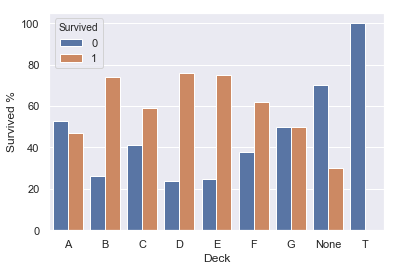

In [113]:
sns.barplot(data=survived_per.reset_index(), x='Deck', y='Survived %', hue='Survived')

Analysis:
- Deck A - 1st class, average survival rate - would put with AC (106)
- Deck B - 1st class, highest survival rate - would put with BT (66)
- Deck C - 1st class, high survival rate - would put with AC
- Deck T - 1st class, only 1 passenger! - would put with BT
- Deck D - 1st and 2nd class - highest survival rate - would put with DE (87)
- E - all classes - highest survival rate - would put with DE
- F - classes 2 & 3, high survival rate, very small category - would put together with FG (26)
- G - only class 3, average survival rate, very small category.  - would put together with FG
- Most people in class 2 and 3 didn't have a known Deck

In [131]:
print('Number of ticket frequencies - similar to family but maybe traveling in groups that are not family')
train.groupby('Ticket')['Ticket'].transform('count').head(10)

Number of ticket frequencies - similar to family but maybe traveling in groups that are not family


0    1
1    1
2    1
3    2
4    1
5    1
6    1
7    4
8    3
9    2
Name: Ticket, dtype: int64

In [133]:
print('Difference between family number and ticket frequency:')
(train['SibSp'] + train['Parch'] + 1 - train.groupby('Ticket')['Ticket'].transform('count')).describe()

Difference between family number and ticket frequency:


count    891.000000
mean       0.116723
std        1.080918
min       -6.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
dtype: float64